In [72]:
Packages <- c("dplyr", "broom", "gdata","lme4", "ape","vegan","viridis", "ggpubr","gridExtra", "colorRamps","ggplot2", "fields", "stringr", "reshape2", "splitstackshape", "readr", "dplyr", "tidyr", "stringr", "tidyverse", "tibble", "ggfortify", "lubridate", "RColorBrewer", "vegan", "vcfR")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0


setwd('/local/home/katrinac/migest')

source("~/scripts/conleyte.R")
source("~/scripts/conlabor.R")
#labor <- conlabor()
#leyte <- conleyte()

In [73]:
##read data as data frame
conndfall <- read.table("~/migest/input/conndfall.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
conndf12 <- read.table("~/migest/input/conndf2012.txt", header=TRUE, sep=",")
conndf13 <- read.table("~/migest/input/conndf2013.txt", header=TRUE, sep=",")
conndf14 <- read.table("~/migest/input/conndf2014.txt", header=TRUE, sep=",")
conndf15 <- read.table("~/migest/input/conndf2015.txt", header=TRUE, sep=",")
#all years together in one df
conndf_allyears <- read.table("~/migest/input/conndf_allyears.txt", header=TRUE, sep=",", stringsAsFactors=FALSE)
#change the years to numeric
conndf_allyears$year <- gsub("migration_rate", "20", conndf_allyears$year)


#read in connectivity matrices 

connmat_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/migest_conmat_all.txt", header=TRUE)
connmat12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/migest_conmat12_2.txt", header=TRUE)
connmat13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/migest_conmat13_2.txt", header=TRUE)
connmat14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/migest_conmat14_2.txt", header=TRUE)
connmat15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/migest_conmat15_2.txt", header=TRUE)


#read in a distance matrix
dist <- read.csv("~/parentage/kernel_fitting/distance_matrix_header.csv", header=TRUE,)
names(dist) <- gsub("\\.", " ", names(dist))

#read in the site codes
sites_all <- read.table(file="~/migest/average_allyears/20180921_prop_samp_corr2/input_sites_all.txt", header=TRUE)
sites_all$site <- gsub("_", " ", sites_all$site, fixed=TRUE)
sites12 <- read.table(file="~/migest/annual/2012/20180921_prop_samp_corr2/input_sites_2012.txt", header= TRUE)
sites12$site <- gsub("_", " ", sites12$site, fixed=TRUE)
sites13 <- read.table(file="~/migest/annual/2013/20180921_prop_samp_corr2/input_sites_2013.txt", header=TRUE)
sites13$site <- gsub("_", " ", sites13$site, fixed=TRUE)
sites14 <- read.table(file="~/migest/annual/2014/20180921_prop_samp_corr2/input_sites_2014.txt", header=TRUE)
sites14$site <- gsub("_", " ", sites14$site, fixed=TRUE)
sites15 <- read.table(file="~/migest/annual/2015/20180921_prop_samp_corr2/input_sites_2015.txt", header=TRUE)
sites15$site <- gsub("_", " ", sites15$site, fixed=TRUE)

#read in site area
area <- read.csv("~/parentage/kernel_fitting/site_area_header.csv", header=TRUE,)
area$site <- gsub("\\_", " ", area$site)

#make list of site names north to south to make distance and connectivity matrices compatible
sites_NS <- as.data.frame(dist$site, stringsAsFactors = FALSE) %>% rename(site="dist$site") 
sites_all_NS <- suppressWarnings(left_join(sites_NS, sites_all, by="site"))
#arrange annual site lists NS
sites12_NS <- suppressWarnings(inner_join(sites_NS, sites12, by="site"))
sites13_NS <- suppressWarnings(inner_join(sites_NS, sites13, by="site"))
sites14_NS <- suppressWarnings(inner_join(sites_NS, sites14, by="site"))
sites15_NS <- suppressWarnings(inner_join(sites_NS, sites15, by="site"))


#make distance matrix for all years connectivity
#prep matrices for mantel test

#sort sites NS
connmat_all_beta <- left_join(sites_all_NS, connmat_all, by=c(pop="Pop"))
connmat_all_NS <- connmat_all_beta %>%
    select(-Ghost, -pop) %>%
    t()

##filter the matrix to be symmetric
connmat_all_t <- as.data.frame(connmat_all_NS)
connmat_all_t$pop <- rownames(connmat_all_t)
connmat_all_t$pop <- gsub("Pop", "", connmat_all_t$pop)
connmat_all_t$pop <- as.numeric(connmat_all_t$pop)
connmat_all_NS <- left_join(sites_all_NS, connmat_all_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat_all_NS) <- "numeric" #make numeric to convert to Bray distance matrix



#annual
#2012
connmat12_noghost <- connmat12 %>%
    select(-Ghost)
connmat12_beta <- left_join(sites12_NS, connmat12_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat12_t <- as.data.frame(connmat12_beta)
connmat12_t$pop <- rownames(connmat12_t)
connmat12_t$pop <- gsub("Pop", "", connmat12_t$pop)
connmat12_t$pop <- as.numeric(connmat12_t$pop)
connmat12_NS <- left_join(sites12_NS, connmat12_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat12_NS) <- "numeric"


#2013
connmat13_noghost <- connmat13 %>%
    select(-Ghost)
connmat13_beta <- left_join(sites13_NS, connmat13_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat13_t <- as.data.frame(connmat13_beta)
connmat13_t$pop <- rownames(connmat13_t)
connmat13_t$pop <- gsub("Pop", "", connmat13_t$pop)
connmat13_t$pop <- as.numeric(connmat13_t$pop)
connmat13_NS <- left_join(sites13_NS, connmat13_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat13_NS) <- "numeric"


#2014
connmat14_noghost <- connmat14 %>%
    select(-Ghost)
connmat14_beta <- left_join(sites14_NS, connmat14_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat14_t <- as.data.frame(connmat14_beta)
connmat14_t$pop <- rownames(connmat14_t)
connmat14_t$pop <- gsub("Pop", "", connmat14_t$pop)
connmat14_t$pop <- as.numeric(connmat14_t$pop)
connmat14_NS <- left_join(sites14_NS, connmat14_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat14_NS) <- "numeric"


#2015
connmat15_noghost <- connmat15 %>%
    select(-Ghost)
connmat15_beta <- left_join(sites15_NS, connmat15_noghost, by=c(pop="Pop")) %>% #only sites sampled in given year 
    select(-pop, -site) %>% #drop site/pop columns, only needed it to sort
    t()
##filter the matrix to be symmetric
connmat15_t <- as.data.frame(connmat15_beta)
connmat15_t$pop <- rownames(connmat15_t)
connmat15_t$pop <- gsub("Pop", "", connmat15_t$pop)
connmat15_t$pop <- as.numeric(connmat15_t$pop)
connmat15_NS <- left_join(sites15_NS, connmat15_t, by="pop") %>% #only sites sampled in given year
    select(-pop, -site) %>%
    t() #be sure to check that diagonals are zero, because that's the right format for the mantel test
class(connmat15_NS) <- "numeric"







Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

## is there a relationship between source/destination size and emmigration/immigration rate?

In [74]:
area <- area %>%
    mutate(km_sq=msq/1000000)
#area of source
#MEAN
conndfall$migration_rate[is.na(conndfall$migration_rate)] <- 0 #if using mean to score source/destination strength, then NA's (which represent zeros) are valuable information
#conndfall$destination <-  #if using mean to score source/destination strength, then NA's (which represent zeros) are valuable information

#area of source
conndfall_export <- conndfall %>%
    filter(source != "Ghost")%>%
    filter(destination != source) #NO SELF RECRUITMENT

source_area_mean <- conndfall_export %>%
    group_by(source) %>%
    mutate(mean_emmig_rate = prod(migration_rate)^(1/length(migration_rate))) #%>%
    #distinct(destination, source, .keep_all = TRUE)

source_area <- left_join(source_area_mean, area, by=c(source="site")) %>%
    rename(source_km_sq=km_sq) %>%
    group_by(source) %>%
    distinct(source, .keep_all = TRUE) %>%    
    select(-migration_rate, -destination) %>%
    ungroup()


#area of destination MEAN
dest_area_mean <- conndfall_export %>%
    group_by(destination) %>%
    mutate(mean_immig_rate = prod(migration_rate)^(1/length(migration_rate))) #%>%
   # distinct(destination, source, .keep_all = TRUE)

dest_area <- left_join(dest_area_mean, area, by=c(destination="site")) %>%
    rename(destination_km_sq=km_sq) %>%
    group_by(destination) %>%
    distinct(destination, .keep_all = TRUE) %>%
    select(-migration_rate, -source) %>%
    ungroup()


#SELF-RECRUITMENT

conndfall_self <- conndfall %>%
    filter(source != "Ghost")%>%
    filter(destination == source) #NO SELF RECRUITMENT

self_area_mean <- conndfall_self %>%
    group_by(source) %>%
    mutate(mean_self_rate = prod(migration_rate)^(1/length(migration_rate))) #%>%
    #distinct(destination, source, .keep_all = TRUE)

self_area <- left_join(self_area_mean, area, by=c(source="site")) %>%
    rename(source_km_sq=km_sq) %>%
    group_by(source) %>%
    distinct(source, .keep_all = TRUE) %>%    
    select(-migration_rate, -destination) %>%
    ungroup()



#Are these patterns variable across years, or consistent?
conndf_allyears$migration_rate[is.na(conndf_allyears$migration_rate)] <- 0 #if using mean to score source/destination strength, then NA's (which represent zeros) are valuable information

#area of source
conndf_allyears_export <- conndf_allyears %>%
    filter(source != "Ghost")%>%
    filter(destination != source) #NO SELF RECRUITMENT

source_area_allyears <- left_join(conndf_allyears_export, area, by=c(source="site")) %>%
    rename(source_km_sq=km_sq) %>%
    group_by(source, year) %>%
    distinct(source, year, .keep_all = TRUE) %>%    
    select(-msq)

#area of destination
dest_area_allyears <- left_join(conndf_allyears_export, area, by=c(destination="site")) %>%
    rename(destination_km_sq=km_sq) %>%
    group_by(destination, year) %>%
    distinct(destination, year, .keep_all = TRUE) %>%    
    select(-msq)

#for self-recruitment
conndf_allyears_self <- conndf_allyears %>%
    filter(source != "Ghost") %>%
    filter(destination == source) #SELF RECRUITMENT

self_area_allyears <- left_join(conndf_allyears_self, area, by=c(source="site")) %>%
    rename(source_km_sq=km_sq) %>%
    group_by(source, year) %>%
    distinct(source, year, .keep_all = TRUE) %>%    
    select(-msq, -destination)




In [75]:
source_area_lm <- lm(mean_emmig_rate~source_km_sq, data=source_area)
dest_area_lm <- lm(mean_immig_rate~destination_km_sq, data=dest_area)
self_area_lm <- lm(mean_self_rate~source_km_sq, data=self_area)

summary(source_area_lm) 
summary(dest_area_lm) 
summary(self_area_lm) 

# can't decide if LM is the right fit, talk to malin about this

#source_area_lm <- glm(mean_emmig_rate~source_km_sq, data=source_area, family=gaussian(link = "log"))
#dest_area_lm <- glm(mean_immig_rate~destination_km_sq, data=dest_area, family=gaussian(link = "log"))
#self_area_lm <- glm(mean_self_rate~source_km_sq, data=self_area, family=gaussian(link = "log"))
#




Call:
lm(formula = mean_emmig_rate ~ source_km_sq, data = source_area)

Residuals:
       Min         1Q     Median         3Q        Max 
-7.885e-04 -1.585e-04 -9.353e-05 -4.715e-05  1.313e-03 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0001395  0.0001582   0.882    0.391  
source_km_sq 0.0095790  0.0042100   2.275    0.037 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0004966 on 16 degrees of freedom
Multiple R-squared:  0.2445,	Adjusted R-squared:  0.1972 
F-statistic: 5.177 on 1 and 16 DF,  p-value: 0.037



Call:
lm(formula = mean_immig_rate ~ destination_km_sq, data = dest_area)

Residuals:
       Min         1Q     Median         3Q        Max 
-3.605e-04 -1.475e-04 -1.366e-04  6.476e-05  8.597e-04 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)       2.356e-04  9.889e-05   2.382    0.030 *
destination_km_sq 2.028e-03  2.632e-03   0.770    0.452  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0003105 on 16 degrees of freedom
Multiple R-squared:  0.03576,	Adjusted R-squared:  -0.0245 
F-statistic: 0.5934 on 1 and 16 DF,  p-value: 0.4523



Call:
lm(formula = mean_self_rate ~ source_km_sq, data = self_area)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16951 -0.08585 -0.06407  0.03372  0.31195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.04620    0.04982   0.927   0.3676  
source_km_sq  2.88920    1.32624   2.178   0.0447 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1565 on 16 degrees of freedom
Multiple R-squared:  0.2288,	Adjusted R-squared:  0.1806 
F-statistic: 4.746 on 1 and 16 DF,  p-value: 0.04467


In [76]:
summary(source_area$source_km_sq)
x <- (0.105998-0.001769)/17
new_area <- source_area$source_km_sq
#new_area <- as.data.frame(new_area)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001769 0.005927 0.011357 0.025262 0.042210 0.105998 

In [77]:
#extract coefficients for plotting
#coef_source <- tidy(source_area_lm, conf.int = TRUE)
coef_source <- coef(source_area_lm)
coef_dest <- coef(dest_area_lm)
coef_self <- coef(self_area_lm)

#confidence intervals 
conf_interval_source <- predict(source_area_lm, newdata=data.frame(source_km_sq=new_area), interval="confidence", level = 0.95)
conf_interval_dest <- predict(dest_area_lm, newdata=data.frame(destination_km_sq=new_area), interval="confidence", level = 0.95)
conf_interval_self <- predict(self_area_lm, newdata=data.frame(source_km_sq=new_area), interval="confidence", level = 0.95)


In [78]:
new_area <- as.data.frame(new_area)
pred_data_source <- cbind(new_area, conf_interval_source)
#can't figure out how to plot confidence intervals and it makes me want to scream, re-visit later


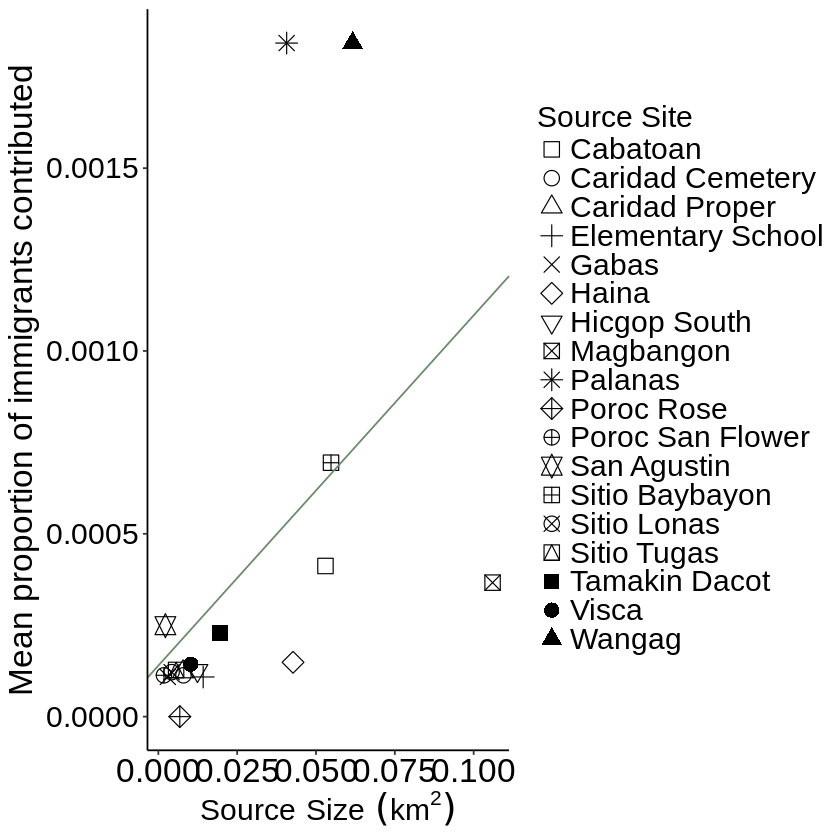

In [92]:
#export rates
source_area_plot <- ggplot(source_area, aes(source_km_sq, mean_emmig_rate, shape=source)) +
    geom_point(size=4) +
    scale_shape_manual(values=seq(0,18)) +
    geom_abline(data = pred_data_source, aes(intercept =coef_source[1], slope = coef_source[2]), color = "darkseagreen4")+
   # geom_ribbon(data=pred_data_source,aes(x=new_area, ymin=lwr,ymax=upr),alpha=0.3)+
    ylab("Mean proportion of immigrants contributed") +
    xlab(expression(Source~Size~(km^2))) +
    theme(axis.title.y=element_text(size=20, color="black"),
    axis.title.x=element_text(size=18, color="black"),
    axis.text.x = element_text(size=20, color="black"),
    axis.text.y = element_text(size=18, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black"))+
    labs(shape='Source Site') +
    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18)) #+
 #   scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))


    
source_area_plot
ggsave(filename="source_size_lm.png", plot=source_area_plot,width = 12, height = 9, path="~/migest/figures")

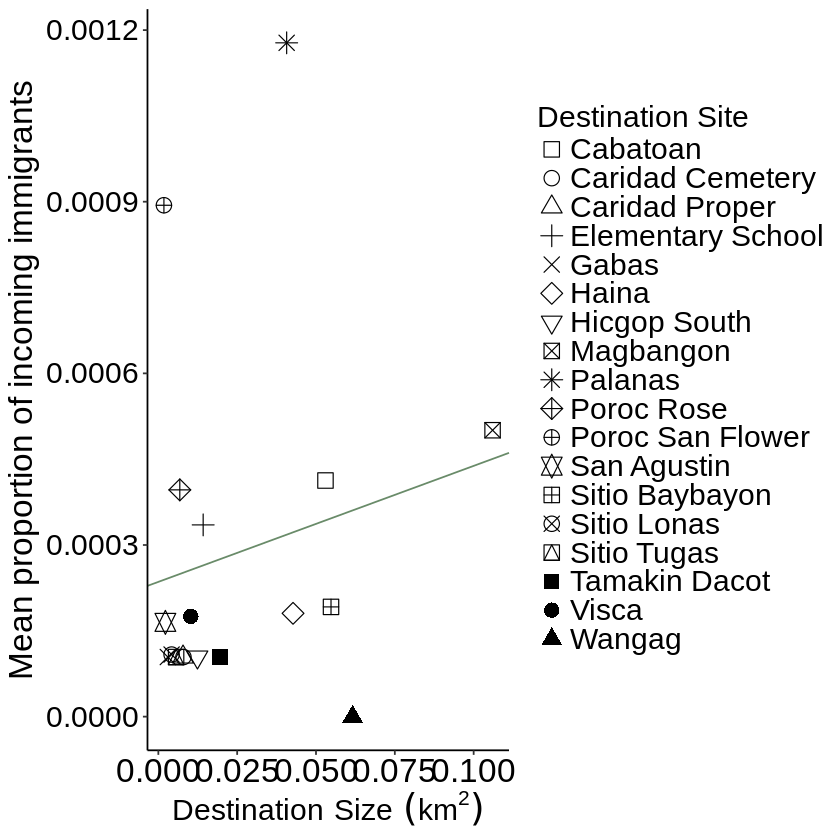

In [96]:
##THIS DOESN'T SEEM LIKE A BIOLOGICALLY RELEVANT ANALYSIS BECAUSE DESTINATION AREA DOESN'T HAVE A SIGNIFICANT RELATIONSHIP WITH IMMIGRATION RATES



#dest_area_plot <- ggplot(dest_area, aes(destination_km_sq, mean_immig_rate, shape=destination)) +
#    geom_point(size=4) +
#    scale_shape_manual(values=seq(0,18)) +
#    geom_abline(data = dest_area, aes(intercept =coef_dest[1], slope = coef_dest[2]), color = "darkseagreen4")+
#    ylab("Mean proportion of incoming immigrants") +
#    xlab(expression(Destination~Size~(km^2))) +
#    theme(axis.title.y=element_text(size=20, color="black"),
#    axis.title.x=element_text(size=18, color="black"),
#    axis.text.x = element_text(size=20, color="black"),
#    axis.text.y = element_text(size=18, color="black")) +
#    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
#    panel.grid.minor = element_blank(), panel.background = element_blank(),
#    axis.line = element_line(colour = "black")) +
#    labs(shape='Destination Site') +
#    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18))#+
#    #scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))
#    
#dest_area_plot
#ggsave(filename="dest_size_lm.png", plot=dest_area_plot, width = 12, height = 9, path="~/migest/figures")

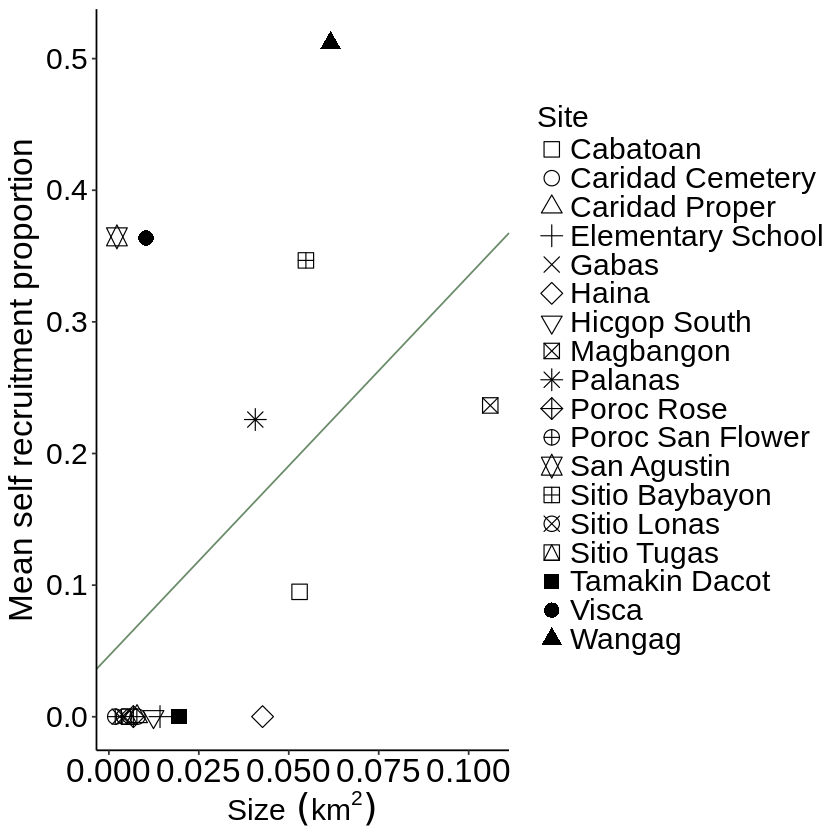

In [95]:
#SELF-RECRUITMENT
self_area_plot <- ggplot(self_area, aes(source_km_sq, mean_self_rate, shape=source)) +
    geom_point(size=4) +
    scale_shape_manual(values=seq(0,18)) +
    geom_abline(data = self_area, aes(intercept =coef_self[1], slope = coef_self[2]), color = "darkseagreen4")+
    ylab("Mean self recruitment proportion") +
    xlab(expression(Size~(km^2))) +
    theme(axis.title.y=element_text(size=20, color="black"),
    axis.title.x=element_text(size=18, color="black"),
    axis.text.x = element_text(size=20, color="black"),
    axis.text.y = element_text(size=18, color="black")) +
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black"))+
    labs(shape='Site') +
    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18))#+
    #scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))
    
self_area_plot
ggsave(filename="self_size_lm.png", plot=self_area_plot, width = 12, height = 9, path="~/migest/figures")

### fit a generalized linear mixed model, with random slope/intercept to account for year as a nuisance variable

## It looks like the size of the destination site so not predict fraction of immigration to the site, which seems to be expected, because this isn't NUMBER of migrants, it's FRACTION of migrants from within the metapopulation. So these immigration rates aren't really informative for that? Check with Malin
## It does appear that larger sites contribute more immigration within the metapopulation, and have higher self-recruitment rates

## is there annual variation in this pattern?

In [81]:
source_area_allyears$year <- as.numeric(source_area_allyears$year)
self_area_allyears$year <- as.character(self_area_allyears$year)

In [82]:
source_area_year_lm <- lm(migration_rate~year, data=source_area_allyears)
summary(source_area_year_lm)
#YEAR DOESN'T MATTER for source/destination
#what about self?




Call:
lm(formula = migration_rate ~ year, data = source_area_allyears)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014579 -0.011505 -0.008681 -0.005881  0.274419 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -5.827481   9.974115  -0.584    0.561
year         0.002899   0.004954   0.585    0.561

Residual standard error: 0.04144 on 54 degrees of freedom
Multiple R-squared:  0.006304,	Adjusted R-squared:  -0.0121 
F-statistic: 0.3426 on 1 and 54 DF,  p-value: 0.5608


In [66]:
#(self_area_allyears)

In [99]:
#subset for wangag to plot for a relationship
wangag <- self_area_allyears %>%
    filter(source== "Wangag")

In [102]:
wangag

source,year,migration_rate,source_km_sq
Wangag,2013,0.0001,0.061622
Wangag,2012,0.9986,0.061622
Wangag,2014,0.8158,0.061622
Wangag,2015,0.0001,0.061622


In [83]:
df_self_lm = self_area_allyears %>% group_by(source) %>%
  do(fit_year = lm(migration_rate ~ as.factor(year), data =self_area_allyears))

# get the coefficients by group in a tidy data_frame
df_self_year_coef = tidy(df_self_lm, fit_year)
df_self_year_coef


# YEAR DOESN'T MATTER

In [28]:
#not relevant, year doesn't matter

#source_area_plot_years <- ggplot(source_area_allyears, aes(source_km_sq, migration_rate, color=as.factor(year))) +
#    geom_point(size=4) +
#    scale_shape_manual(values=seq(0,18)) +
#    geom_smooth(method="lm", se=FALSE)+
#    ylab("Proportion of immigrants contributed") +
#    xlab(expression(Source~Size~(km^2))) +
#    theme(axis.title.y=element_text(size=20, color="black"),
#    axis.title.x=element_text(size=18, color="black"),
#    axis.text.x = element_text(size=20, color="black"),
#    axis.text.y = element_text(size=18, color="black")) +
#    #scale_y_continuous(expand = c(0, 0), limits = c(0, 1))+
#    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
#    panel.grid.minor = element_blank(), panel.background = element_blank(),
#    axis.line = element_line(colour = "black"))+
#    labs(color='Year') +
#    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18)) +
#    scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))
#
#
#source_area_plot_years
##looks different from the source area plots above because those are the GEOMETRIC mean, this is raw proportion
#
##ggsave(filename="source_size_annual_lm.png", plot=source_area_plot_years, width = 12, height = 9, path="~/migest/figures")

In [29]:
###THIS DOESN'T SEEM LIKE A BIOLOGICALLY RELEVANT ANALYSIS BECAUSE DESTINATION AREA DOESN'T HAVE A SIGNIFICANT RELATIONSHIP WITH IMMIGRATION RATES


#export rates

#dest_area_plot_years <- ggplot(dest_area_allyears, aes(destination_km_sq, migration_rate, color=as.factor(year))) +
#    geom_point(size=4) +
#    scale_shape_manual(values=seq(0,18)) +
#    geom_smooth(method="lm", se=FALSE)+
#    ylab("Proportion of incoming immigrants") +
#    xlab(expression(Destination~Size~(km^2))) +
#    theme(axis.title.y=element_text(size=20, color="black"),
#    axis.title.x=element_text(size=18, color="black"),
#    axis.text.x = element_text(size=20, color="black"),
#    axis.text.y = element_text(size=18, color="black")) +
#    #scale_y_continuous(expand = c(0, 0), limits = c(0, 1))+
#    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
#    panel.grid.minor = element_blank(), panel.background = element_blank(),
#    axis.line = element_line(colour = "black"))+
#    labs(color='Year') +
#    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18)) +
#    scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))
#
#
#dest_area_plot_years
##ggsave(filename="dest_size_years_lm.png", plot=dest_area_plot_years, width = 12, height = 9, path="~/migest/figures")

In [97]:
#self_area_plot_years <- ggplot(self_area_allyears, aes(source_km_sq, migration_rate, color=as.factor(year))) +
#    geom_point(size=4) +
#    scale_shape_manual(values=seq(0,18)) +
#    geom_smooth(method="lm", se=FALSE)+
#    ylab("Proportion of incoming immigrants") +
#    xlab(expression(Site~Size~(km^2))) +
#    theme(axis.title.y=element_text(size=20, color="black"),
#    axis.title.x=element_text(size=18, color="black"),
#    axis.text.x = element_text(size=20, color="black"),
#    axis.text.y = element_text(size=18, color="black")) +
#    #scale_y_continuous(expand = c(0, 0), limits = c(0, 1))+
#    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
#    panel.grid.minor = element_blank(), panel.background = element_blank(),
#    axis.line = element_line(colour = "black"))+
#    labs(color='Year') +
#    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18)) +
#    scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))
#
#
#self_area_plot_years
##ggsave(filename="self_size_years.png", plot=self_area_plot_years, width = 12, height = 9, path="~/migest/figures")

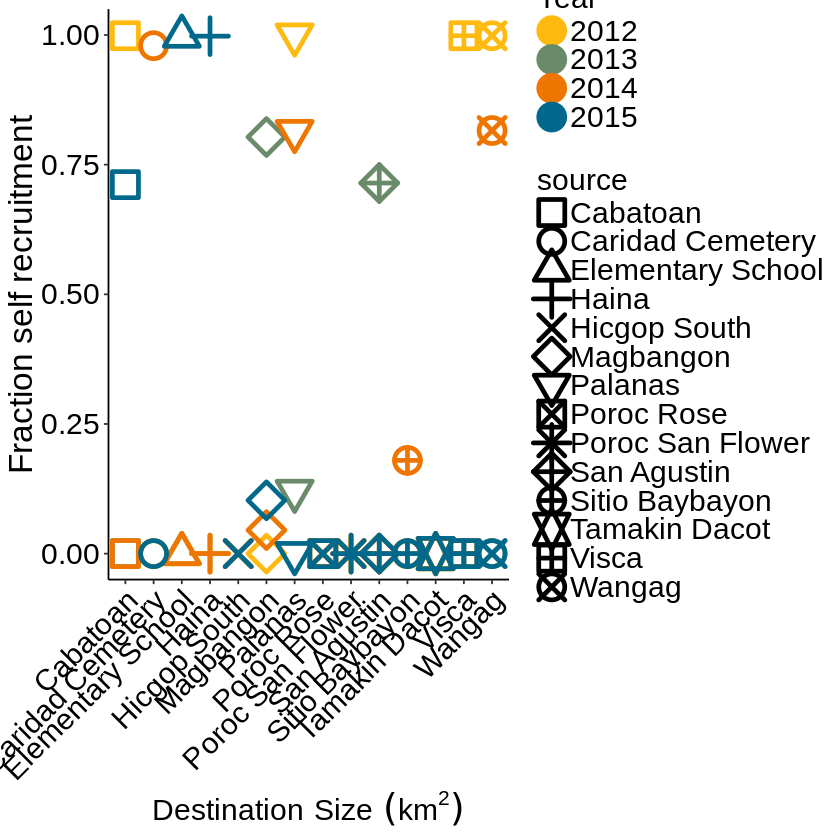

In [115]:
#plot self recruitment by year for each site

self_recruit_plot_years <- ggplot(self_area_allyears, aes(source, migration_rate, shape= source, color=as.factor(year))) +
    geom_point(size=6, stroke=2) +
    scale_shape_manual(values=seq(0,18)) +
    geom_smooth(method="lm", se=FALSE)+
    ylab("Fraction self recruitment") +
    xlab(expression(Destination~Size~(km^2))) +
    theme(axis.title.y=element_text(size=20, color="black"),
    axis.title.x=element_text(size=18, color="black"),
    axis.text.x = element_text(size=18, color="black"),
    axis.text.y = element_text(size=18, color="black")) +
    #scale_y_continuous(expand = c(0, 0), limits = c(0, 1))+
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), panel.background = element_blank(),
    axis.line = element_line(colour = "black"))+
    labs(color='Year') +
    theme(axis.text.x=element_text(angle=45,hjust=1)) +
    theme(legend.key = element_blank(), legend.title= element_text(size=18), legend.text= element_text(size=18)) +
    scale_colour_manual(values = c("2012" = "darkgoldenrod1", "2013" = "darkseagreen4", "2014"="darkorange2", "2015"="deepskyblue4"))


self_recruit_plot_years
ggsave(filename="self_recruit_years.png", plot=self_recruit_plot_years, width = 12, height = 9, path="~/migest/figures")